## Week 4, Lab 2: Predicting Chronic Kidney Disease in Patients
> Author: Matt Brems

We can sketch out the data science process as follows:
1. Define the problem.
2. Obtain the data.
3. Explore the data.
4. Model the data.
5. Evaluate the model.
6. Answer the problem.

In this lab, we're going to focus on steps exploring data, building models and evaluating the models we build.

There are three links you may find important:
- [A set of chronic kidney disease (CKD) data and other biological factors](./chronic_kidney_disease_full.csv).
- [The CKD data dictionary](./chronic_kidney_disease_header.txt).
- [An article comparing the use of k-nearest neighbors and support vector machines on predicting CKD](./chronic_kidney_disease.pdf).

## Step 1: Define the problem.

Suppose you're working for Mayo Clinic, widely recognized to be the top hospital in the United States. In your work, you've overheard nurses and doctors discuss test results, then arrive at a conclusion as to whether or not someone has developed a particular disease or condition. For example, you might overhear something like:

> **Nurse**: Male 57 year-old patient presents with severe chest pain. FDP _(short for fibrin degradation product)_ was elevated at 13. We did an echo _(echocardiogram)_ and it was inconclusive.

> **Doctor**: What was his interarm BP? _(blood pressure)_

> **Nurse**: Systolic was 140 on the right; 110 on the left.

> **Doctor**: Dammit, it's an aortic dissection! Get to the OR _(operating room)_ now!

> _(intense music playing)_

In this fictitious but [Shonda Rhimes-esque](https://en.wikipedia.org/wiki/Shonda_Rhimes#Grey's_Anatomy,_Private_Practice,_Scandal_and_other_projects_with_ABC) scenario, you might imagine the doctor going through a series of steps like a [flowchart](https://en.wikipedia.org/wiki/Flowchart), or a series of if-this-then-that steps to diagnose a patient. The first steps made the doctor ask what the interarm blood pressure was. Because interarm blood pressure took on the values it took on, the doctor diagnosed the patient with an aortic dissection.

Your goal, as a research biostatistical data scientist at the nation's top hospital, is to develop a medical test that can improve upon our current diagnosis system for [chronic kidney disease (CKD)](https://www.mayoclinic.org/diseases-conditions/chronic-kidney-disease/symptoms-causes/syc-20354521).

**Real-world problem**: Develop a medical diagnosis test that is better than our current diagnosis system for CKD.

**Data science problem**: Develop a medical diagnosis test that reduces both the number of false positives and the number of false negatives.

---

## Step 2: Obtain the data.

### 1. Read in the data.

In [2]:
import pandas as pd
import numpy as np


In [3]:
df = pd.read_csv('chronic_kidney_disease_full.csv')

### 2. Check out the data dictionary. What are a few features or relationships you might be interested in checking out?

In [4]:
df.columns

Index(['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu',
       'sc', 'sod', 'pot', 'hemo', 'pcv', 'wbcc', 'rbcc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'class'],
      dtype='object')

In [5]:
df.info

<bound method DataFrame.info of       age    bp     sg   al   su     rbc        pc         pcc          ba  \
0    48.0  80.0  1.020  1.0  0.0     NaN    normal  notpresent  notpresent   
1     7.0  50.0  1.020  4.0  0.0     NaN    normal  notpresent  notpresent   
2    62.0  80.0  1.010  2.0  3.0  normal    normal  notpresent  notpresent   
3    48.0  70.0  1.005  4.0  0.0  normal  abnormal     present  notpresent   
4    51.0  80.0  1.010  2.0  0.0  normal    normal  notpresent  notpresent   
..    ...   ...    ...  ...  ...     ...       ...         ...         ...   
395  55.0  80.0  1.020  0.0  0.0  normal    normal  notpresent  notpresent   
396  42.0  70.0  1.025  0.0  0.0  normal    normal  notpresent  notpresent   
397  12.0  80.0  1.020  0.0  0.0  normal    normal  notpresent  notpresent   
398  17.0  60.0  1.025  0.0  0.0  normal    normal  notpresent  notpresent   
399  58.0  80.0  1.025  0.0  0.0  normal    normal  notpresent  notpresent   

       bgr  ...   pcv    wbcc  

Answer: age, bp, su, appet, sod, pot, cad

---

## Step 3: Explore the data.

### 3. How much of the data is missing from each column?

In [6]:
df.isnull().sum()

age        9
bp        12
sg        47
al        46
su        49
rbc      152
pc        65
pcc        4
ba         4
bgr       44
bu        19
sc        17
sod       87
pot       88
hemo      52
pcv       71
wbcc     106
rbcc     131
htn        2
dm         2
cad        2
appet      1
pe         1
ane        1
class      0
dtype: int64

### 4. Suppose that I dropped every row that contained at least one missing value. (In the context of analysis with missing data, we call this a "complete case analysis," because we keep only the complete cases!) How many rows would remain in our dataframe? What are at least two downsides to doing this?

> There's a good visual on slide 15 of [this deck](https://liberalarts.utexas.edu/prc/_files/cs/Missing-Data.pdf) that shows what a complete case analysis looks like if you're interested.

In [7]:
df.dropna(inplace = True)


In [8]:
df.head(30
        )


,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,ckd
9,53.0,90.0,1.020,2.0,0.0,abnormal,abnormal,present,notpresent,70.0,...,29.0,12100.0,3.7,yes,yes,no,poor,no,yes,ckd
11,63.0,70.0,1.010,3.0,0.0,abnormal,abnormal,present,notpresent,380.0,...,32.0,4500.0,3.8,yes,yes,no,poor,yes,no,ckd
14,68.0,80.0,1.010,3.0,2.0,normal,abnormal,present,present,157.0,...,16.0,11000.0,2.6,yes,yes,yes,poor,yes,no,ckd
20,61.0,80.0,1.015,2.0,0.0,abnormal,abnormal,notpresent,notpresent,173.0,...,24.0,9200.0,3.2,yes,yes,yes,poor,yes,yes,ckd
22,48.0,80.0,1.025,4.0,0.0,normal,abnormal,notpresent,notpresent,95.0,...,32.0,6900.0,3.4,yes,no,no,good,no,yes,ckd
27,69.0,70.0,1.010,3.0,4.0,normal,abnormal,notpresent,notpresent,264.0,...,37.0,9600.0,4.1,yes,yes,yes,good,yes,no,ckd
48,73.0,70.0,1.005,0.0,0.0,normal,normal,notpresent,notpresent,70.0,...,29.0,18900.0,3.5,yes,yes,no,good,yes,no,ckd
58,73.0,80.0,1.020,2.0,0.0,abnormal,abnormal,notpresent,notpresent,253.0,...,33.0,7200.0,4.3,yes,yes,yes,good,no,no,ckd
71,46.0,60.0,1.010,1.0,0.0,normal,normal,notpresent,notpresent,163.0,...,28.0,14600.0,3.2,yes,yes,no,good,no,no,ckd


In [9]:
df.replace({'abnormal': 0, 'normal': 1, 'present': 1, 'notpresent': 0, 'yes': 1, 'no': 0, 'ckd': 1, 'notckd': 0, 'good': 1, 'poor': 0}, inplace=True)
df.astype(float)

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
3,48.0,70.0,1.005,4.0,0.0,1.0,0.0,1.0,0.0,117.0,...,32.0,6700.0,3.9,1.0,0.0,0.0,0.0,1.0,1.0,1.0
9,53.0,90.0,1.020,2.0,0.0,0.0,0.0,1.0,0.0,70.0,...,29.0,12100.0,3.7,1.0,1.0,0.0,0.0,0.0,1.0,1.0
11,63.0,70.0,1.010,3.0,0.0,0.0,0.0,1.0,0.0,380.0,...,32.0,4500.0,3.8,1.0,1.0,0.0,0.0,1.0,0.0,1.0
14,68.0,80.0,1.010,3.0,2.0,1.0,0.0,1.0,1.0,157.0,...,16.0,11000.0,2.6,1.0,1.0,1.0,0.0,1.0,0.0,1.0
20,61.0,80.0,1.015,2.0,0.0,0.0,0.0,0.0,0.0,173.0,...,24.0,9200.0,3.2,1.0,1.0,1.0,0.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,1.0,1.0,0.0,0.0,140.0,...,47.0,6700.0,4.9,0.0,0.0,0.0,1.0,0.0,0.0,0.0
396,42.0,70.0,1.025,0.0,0.0,1.0,1.0,0.0,0.0,75.0,...,54.0,7800.0,6.2,0.0,0.0,0.0,1.0,0.0,0.0,0.0
397,12.0,80.0,1.020,0.0,0.0,1.0,1.0,0.0,0.0,100.0,...,49.0,6600.0,5.4,0.0,0.0,0.0,1.0,0.0,0.0,0.0
398,17.0,60.0,1.025,0.0,0.0,1.0,1.0,0.0,0.0,114.0,...,51.0,7200.0,5.9,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [10]:
df.dtypes

age      float64
bp       float64
sg       float64
al       float64
su       float64
rbc        int64
pc         int64
pcc        int64
ba         int64
bgr      float64
bu       float64
sc       float64
sod      float64
pot      float64
hemo     float64
pcv      float64
wbcc     float64
rbcc     float64
htn        int64
dm         int64
cad        int64
appet      int64
pe         int64
ane        int64
class      int64
dtype: object

Answer: 158 rows remain. 1. there would be less data to train our model on, making it less reliable. 2. if the missing values are not completely random, dropping them could introduce bias into the analysis. 

### 5. Thinking critically about how our data were gathered, it's likely that these records were gathered by doctors and nurses. Brainstorm three potential areas (in addition to the missing data we've already discussed) where this data might be inaccurate or imprecise.

Answer: 1. Documentation error by the nurses or incorrect measuring methods. 2. patients may not always provide accurate or complete information about medical history, symptoms which leads to bias. 3. Different doctors or hospitals may use different criteria to diagnose medical conditions. 

---

## Step 4: Model the data.

### 6. Suppose that I want to construct a model where no person who has CKD will ever be told that they do not have CKD. What (very simple, no machine learning needed) model can I create that will never tell a person with CKD that they do not have CKD?

> Hint: Don't think about `statsmodels` or `scikit-learn` here.

Answer: KNN classification model that prioritises sensitivity.  

### 7. In problem 6, what common classification metric did we optimize for? Did we minimize false positives or negatives?

Answer: optimised sensitivity, minimise false negatives 


### 8. Thinking ethically, what is at least one disadvantage to the model you described in problem 6?

Answer:increasing sensitivity means theres a higher likelihood of classifying individuals as having kidney diseases when they dont. this might cause unnecessary stress and money spent on treatment. 

### 9. Suppose that I want to construct a model where a person who does not have CKD will ever be told that they do have CKD. What (very simple, no machine learning needed) model can I create that will accomplish this?

Answer: knn classification model

### 10. In problem 9, what common classification metric did we optimize for? Did we minimize false positives or negatives?

Answer: precision. minimise false positive 

### 11. Thinking ethically, what is at least one disadvantage to the model you described in problem 9?

Answer: increasing precision means theres a higher likelihood of classifying individuals as negative when they actually do have CKD, which might worsen their condition when left untreated. 

### 12. Construct a logistic regression model in `sklearn` predicting class from the other variables. You may scale, select/drop, and engineer features as you wish - build a good model! Make sure, however, that you include at least one categorical/dummy feature and at least one quantitative feature.

> Hint: Remember to do a train/test split!

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [15]:

y = df[['class']]
X = df[['age', 'bp', 'su', 'appet', 'sod', 'pot', 'cad']]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 50)

In [16]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

/Users/wz/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/wz/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [17]:
print(f'Logistic Regression Intercept: {lr.intercept_}')
print(f'Logistic Regression Coefficient: {lr.coef_}')

Logistic Regression Intercept: [32.31369324]
Logistic Regression Coefficient: [[ 0.03987084  0.03253764  0.94039481 -0.67797784 -0.30468859  0.98591294
   1.43796066]]


---

## Step 5: Evaluate the model.

### 13. Based on your logistic regression model constructed in problem 12, interpret the coefficient of one of your quantitative features.

age has a coefficient of 0.03987. since the coefficient is positive, the older a person is, the higher the likelihood that he has kidney disease. however, the low magnitude of the coefficient means that the relationship between age and kidney disease is not strong, and that age is not a significant contributing factor for kidney disease. 

### 14. Based on your logistic regression model constructed in problem 12, interpret the coefficient of one of your categorical/dummy features.

cad has the highest coefficient of 1.438. This means that it has the strongest association with kidney disease out of all the features we tested. Since the coefficient is positive, it means that having cad increases the likelihood of having kidney disease 

### 15. Despite being a relatively simple model, logistic regression is very widely used in the real world. Why do you think that's the case? Name at least two advantages to using logistic regression as a modeling technique.

Answer: 1. the results are easily interpretable as the coefficients make it straightforward to understand the impacts of each feature. 2. it is computationally efficient and fast to train, and can handle large datasets with many features.  

### 16. Does it make sense to generate a confusion matrix on our training data or our test data? Why? Generate it on the proper data.

> Hint: Once you've generated your predicted $y$ values and you have your observed $y$ values, then it will be easy to [generate a confusion matrix using sklearn](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html).

it makes more sense to generate on the test data. the confusion matrix is meant to evaluate the performance on the model, meaning that it should be testing its performance on untrained data instead of data the model trained on. 

In [21]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

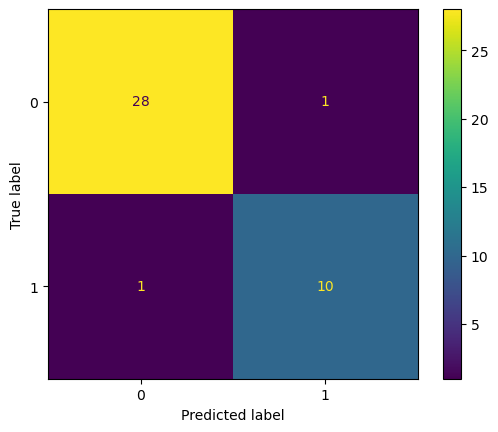

In [23]:
pred = lr.predict(X_test)
cm = confusion_matrix(y_test, pred)
cm
cmd = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels = lr.classes_)
cmd.plot()

### 17. In this hospital case, we want to predict CKD. Do we want to optimize for sensitivity, specificity, or something else? Why? (If you don't think there's one clear answer, that's okay! There rarely is. Be sure to defend your conclusion!)

Answer: optimize for negative predictive value, minimising false negative. this is because in the context of predicting CKD, i do not want to risk diagnosing someone with no CKD when he actually does as this could result in serious consequences for him. 

### 18 (BONUS). Write a function that will create an ROC curve for you, then plot the ROC curve.

Here's a strategy you might consider:
1. In order to even begin, you'll need some fit model. Use your logistic regression model from problem 12.
2. We want to look at all values of your "threshold" - that is, anything where .predict() gives you above your threshold falls in the "positive class," and anything that is below your threshold falls in the "negative class." Start the threshold at 0.
3. At this value of your threshold, calculate the sensitivity and specificity. Store these values.
4. Increment your threshold by some "step." Maybe set your step to be 0.01, or even smaller.
5. At this value of your threshold, calculate the sensitivity and specificity. Store these values.
6. Repeat steps 3 and 4 until you get to the threshold of 1.
7. Plot the values of sensitivity and 1 - specificity.

### 19. Suppose you're speaking with the biostatistics lead at Mayo Clinic, who asks you "Why are unbalanced classes generally a problem? Are they a problem in this particular CKD analysis?" How would you respond?

Answer: unbalanced classes make it challenging for the model to learn meaningful patterns from the minority class due to its limited representaion in the data. the mmodel may struggle to generalise well to new instances of the minority class, resulting in poor performance in real-world scenarios. they are not really a problem in this ckd analysis as the features trained on are the features which are always measured when a patient is admitted to the hospital.

### 20. Suppose you're speaking with a doctor at Mayo Clinic who, despite being very smart, doesn't know much about data science or statistics. How would you explain why unbalanced classes are generally a problem to this doctor?

Answer: certain diseases are rare compared to others. In medical research, if we have a dataset where one disease is very rare compared to others, it becomes challenging to develop accurate diagnostic tools or treatment plans for that specific condition. Similarly, in our dataset, if one class (e.g., patients with a rare disease) is underrepresented compared to others, our model may struggle to learn the patterns associated with that class.

### 21. Let's create very unbalanced classes just for the sake of this example! Generate very unbalanced classes by [bootstrapping](http://stattrek.com/statistics/dictionary.aspx?definition=sampling_with_replacement) (a.k.a. random sampling with replacement) the majority class.

1. The majority class are those individuals with CKD.
2. Generate a random sample of size 200,000 of individuals who have CKD **with replacement**. (Consider setting a random seed for this part!)
3. Create a new dataframe with the original data plus this random sample of data.
4. Now we should have a dataset with around 200,000 observations, of which only about 0.00075% are non-CKD individuals.

In [27]:
majority = df['class']
sample_size = 200000
np.random.seed(42)
bootstrapped_majority = df[df['class'] == 1].sample(n=sample_size, replace=True)
new_data = pd.concat([df, bootstrapped_majority], ignore_index=True)


### 22. Build a logistic regression model on the unbalanced class data and evaluate its performance using whatever method(s) you see fit. How would you describe the impact of unbalanced classes on logistic regression as a classifier?
> Be sure to look at how well it performs on non-CKD data.

In [30]:
lr = LogisticRegression(max_iter = 200000)
y = df[['class']]
y = np.ravel(y)
X = df[['age', 'bp', 'su', 'appet', 'sod', 'pot', 'cad']]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)
lr.fit(X_train, y_train)

LogisticRegression(max_iter=200000)

In [31]:
print(f'Logistic Regression Intercept: {lr.intercept_}')
print(f'Logistic Regression Coefficient: {lr.coef_}')

Logistic Regression Intercept: [66.6930894]
Logistic Regression Coefficient: [[ 0.09395396  0.08982233  1.55256637 -0.750222   -0.58264482  0.07321159
   0.6799542 ]]


the higher intercept suggest that the model leans more to predicting the majority class, in this case positive for CKD. 

---

## Step 6: Answer the problem.

At this step, you would generally answer the problem! In this situation, you would likely present your model to doctors or administrators at the hospital and show how your model results in reduced false positives/false negatives. Next steps would be to find a way to roll this model and its conclusions out across the hospital so that the outcomes of patients with CKD (and without CKD!) can be improved!